In [213]:
import pandas as pd #
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols #
from sklearn.linear_model import LinearRegression

data=pd.read_csv('week2.redbook.csv')

In [214]:
data

,revenue,gender,age,engaged_last_30,lifecycle,days_since_last_order,previous_order_amount,3rd_party_stores
0,72.98,1.0,59.0,0.0,B,4.26,2343.870,0
1,200.99,1.0,51.0,0.0,A,0.94,8539.872,0
2,69.98,1.0,79.0,0.0,C,4.29,1687.646,1
3,649.99,NaN,NaN,NaN,C,14.90,3498.846,0
4,83.59,NaN,NaN,NaN,C,21.13,3968.490,4
...,...,...,...,...,...,...,...,...
29447,43.19,NaN,NaN,NaN,C,0.94,545.180,1
29448,62.97,1.0,53.0,0.0,C,3.45,3738.912,1
29449,87.26,NaN,NaN,NaN,C,10.42,1279.530,0
29450,19.99,1.0,69.0,0.0,C,16.87,669.580,3


In [215]:
print(data.columns)

Index(['revenue', 'gender', 'age', 'engaged_last_30', 'lifecycle',
       ' days_since_last_order ', 'previous_order_amount', '3rd_party_stores'],
      dtype='object')


In [216]:
# delete the repeated value by drop_duplicates()
print(data.duplicated().sum())
print(data[data.duplicated()])
data=data.drop_duplicates()

1
       revenue  gender  age  engaged_last_30 lifecycle  \
13622    99.99     NaN  NaN              NaN         A   

        days_since_last_order   previous_order_amount  3rd_party_stores  
13622                     0.13                    0.0                 0  


In [217]:
data

,revenue,gender,age,engaged_last_30,lifecycle,days_since_last_order,previous_order_amount,3rd_party_stores
0,72.98,1.0,59.0,0.0,B,4.26,2343.870,0
1,200.99,1.0,51.0,0.0,A,0.94,8539.872,0
2,69.98,1.0,79.0,0.0,C,4.29,1687.646,1
3,649.99,NaN,NaN,NaN,C,14.90,3498.846,0
4,83.59,NaN,NaN,NaN,C,21.13,3968.490,4
...,...,...,...,...,...,...,...,...
29447,43.19,NaN,NaN,NaN,C,0.94,545.180,1
29448,62.97,1.0,53.0,0.0,C,3.45,3738.912,1
29449,87.26,NaN,NaN,NaN,C,10.42,1279.530,0
29450,19.99,1.0,69.0,0.0,C,16.87,669.580,3


In [218]:
# lot of nan values, so i decide delete them
print(data.isnull().sum())
data.dropna(inplace=True)

revenue                        0
gender                     11728
age                        12735
engaged_last_30            11728
lifecycle                      0
 days_since_last_order         0
previous_order_amount          0
3rd_party_stores               0
dtype: int64


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [219]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16716 entries, 0 to 29450
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   revenue                  16716 non-null  float64
 1   gender                   16716 non-null  float64
 2   age                      16716 non-null  float64
 3   engaged_last_30          16716 non-null  float64
 4   lifecycle                16716 non-null  object 
 5    days_since_last_order   16716 non-null  float64
 6   previous_order_amount    16716 non-null  float64
 7   3rd_party_stores         16716 non-null  int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 1.1+ MB


In [220]:
gender_total = data.pivot_table(values='age',index='gender',aggfunc='count')
gender_total.index=['female','male']
print(gender_total)
print('ratio',gender_total.iloc[1,0]/gender_total.iloc[0,0])
# iloc[row, column]
#gender_total.index=['female','male','ratio']
#print(gender_total)

          age
female    734
male    15982
ratio 21.77384196185286


In [221]:
# cut split the age
listbins=[0,20,30,40,50,60,70,80,90,100]
listlabel=['under 20','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99']
data['age_group']=pd.cut(data['age'],bins=listbins,labels=listlabel,right=False,include_lowest=True)
data



/var/folders/0m/krm29zjx31j4v1ldykbq32vm0000gn/T/ipykernel_1234/386147467.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age_group']=pd.cut(data['age'],bins=listbins,labels=listlabel,right=False,include_lowest=True)


,revenue,gender,age,engaged_last_30,lifecycle,days_since_last_order,previous_order_amount,3rd_party_stores,age_group
0,72.98,1.0,59.0,0.0,B,4.26,2343.870,0,50-59
1,200.99,1.0,51.0,0.0,A,0.94,8539.872,0,50-59
2,69.98,1.0,79.0,0.0,C,4.29,1687.646,1,70-79
5,319.99,1.0,80.0,0.0,C,15.13,2811.491,10,80-89
6,140.00,1.0,60.0,0.0,C,11.45,769.990,4,60-69
...,...,...,...,...,...,...,...,...,...
29436,618.77,1.0,46.0,0.0,C,9.13,2236.980,0,40-49
29440,58.99,1.0,29.0,0.0,A,0.84,808.980,0,20-29
29443,36.98,1.0,40.0,0.0,B,1.77,138.990,0,40-49
29448,62.97,1.0,53.0,0.0,C,3.45,3738.912,1,50-59


In [222]:
# 1.analyze the community marketing
engaged_last_30_mean=data.pivot_table(index='engaged_last_30', values=['previous_order_amount','revenue'],aggfunc='mean')
print(engaged_last_30_mean) 

                 previous_order_amount     revenue
engaged_last_30                                   
0.0                        2463.216141  362.080838
1.0                        4139.682919  551.065712


In [223]:
#  conclusion 1:
# customers who participated the activity purchase more than customers
# who did not participate the activity

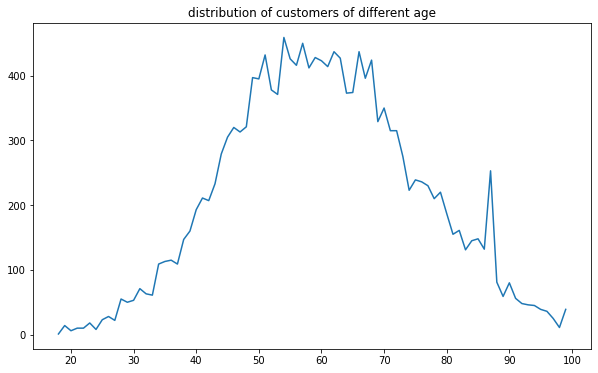

In [224]:
# 2.analyze the age and gender
# use the function of plt.figure() the figuer size is width and heigth
plt.figure(figsize=(10,6))
data.age.value_counts().sort_index().plot()
plt.title("distribution of customers of different age")
plt.show()
# conclusion 1: 
# Most consumer  and main revenue come from middle-aged and elderly people aged 40-70


<function matplotlib.pyplot.show(close=None, block=None)>

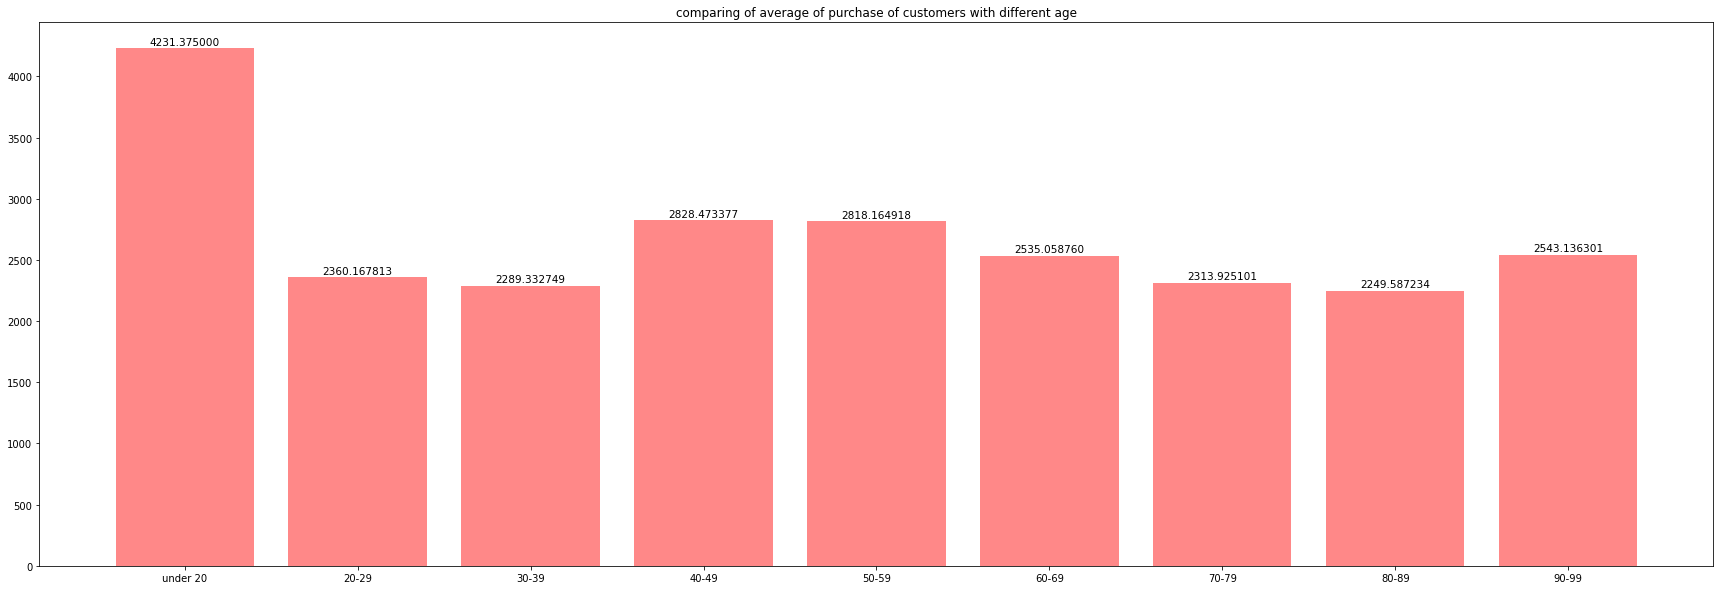

In [225]:
ag_df=data.groupby("age_group")['previous_order_amount'].mean().sort_index()
plt.figure(figsize=(30,10))
plt.bar(x = ag_df.index.tolist( ),height = np.round(ag_df.values,2).tolist(),color='#FF8888')
for x, y in zip(ag_df.index,ag_df.values):
    plt.text(x,y+10,'%f'%y,ha='center',va='bottom',fontsize=10.5)#'%f' % np.float64('nan')
plt.title("comparing of average of purchase of customers with different age")
plt.savefig('final_project')
plt.show
# conclusion 2
# under 20 years old account for the big numbers of total users

<function matplotlib.pyplot.show(close=None, block=None)>

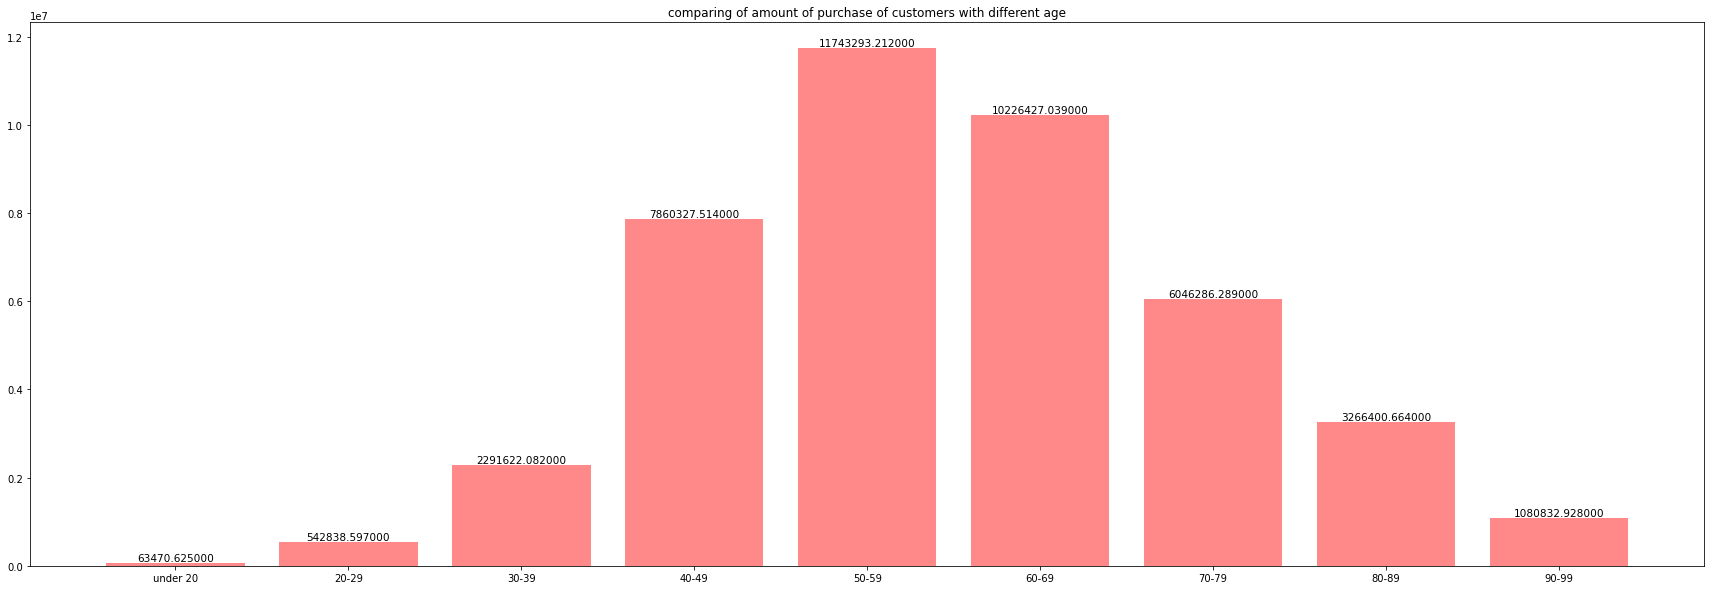

In [226]:
ag_df=data.groupby("age_group")['previous_order_amount'].sum().sort_index()
plt.figure(figsize=(30,10))
plt.bar(x = ag_df.index.tolist( ),height = np.round(ag_df.values,2).tolist(),color='#FF8888')
for x, y in zip(ag_df.index,ag_df.values):
    plt.text(x,y+10,'%f'%y,ha='center',va='bottom',fontsize=10.5)#'%f' % np.float64('nan')
plt.title("comparing of amount of purchase of customers with different age")
plt.savefig('final_project1')
plt.show
# conclusion 3 but the group of 50-59 consumed the biggest amount 
# their will and ability of consuming are more strong than youngers

<function matplotlib.pyplot.show(close=None, block=None)>

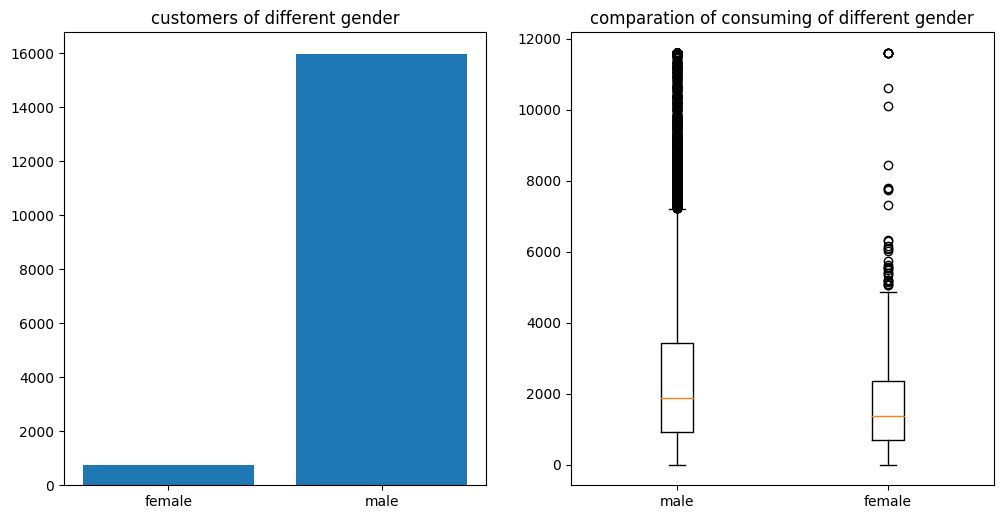

In [227]:
# analysis the gender
fig = plt.figure(figsize=(12,6),dpi=100)#dpi is point
ax1=fig.add_subplot(1,2,1)
plt.bar(x=gender_total.index,height=gender_total['age'])
plt.title('customers of different gender')
ax2= fig.add_subplot(1,2,2)
labels = ['male','female']
box1,box2=[data[data.gender==1]['previous_order_amount'],data[data.gender==0]['previous_order_amount']]
plt.boxplot([box1,box2],labels=labels)
plt.title('comparation of consuming of different gender')
plt.savefig('final_project3')
plt.show
# conclusion 4 the number of male customers is bigger than the number of femal
#  male customers paid more than female customers


In [228]:
# 3. analysis the  precentage of lifecycle 
age_percent=data[['age','lifecycle']].groupby('lifecycle').count( )
print(age_percent)

             age
lifecycle       
A           2099
B           3533
C          11084


In [229]:
income_total=data.pivot_table(values='previous_order_amount', index='lifecycle',
                              aggfunc=np.sum)
print(income_total)

           previous_order_amount
lifecycle                       
A                   6.820573e+06
B                   1.064253e+07
C                   2.565840e+07


In [230]:
# the precentage of participation of activity of different lifecycle
customer_total=data.pivot_table(values=['3rd_party_stores','engaged_last_30'],index='lifecycle',\
                                aggfunc={'3rd_party_stores':'count','engaged_last_30':np.sum})
print(customer_total)

           3rd_party_stores  engaged_last_30
lifecycle                                   
A                      2099            166.0
B                      3533            289.0
C                     11084            706.0


Text(0.5, 1.0, 'percentage of customer of each lifecycle')

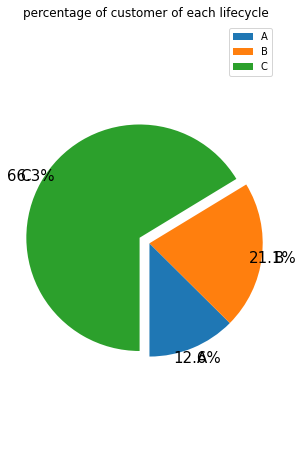

In [231]:
plt.figure(figsize=(16,8))
plt.subplot(1,3,1)
explode=[0,0,0.1]
labels=['A','B','C']
patches, l_text, p_text=plt.pie(age_percent['age'],
                                autopct='%3.1f%%',
                                labels=labels,
                                pctdistance=1.1,
                                radius=1,
                                startangle=270,
                                explode=explode)
for t in l_text:
    t.set_size(15)
for t in p_text:
    t.set_size(15)

plt.axis('equal')
plt.legend()
plt.title('percentage of customer of each lifecycle' )

#labels  show the words out of pie
#explode distance of center
#startangle  angel of drawing
#shadow  
#labeldistance label positon of drawing
#autopct '%1.1f'指小数点前后位数(没有用空格补齐)
#pctdistance similar with labeldistance
#radius                      


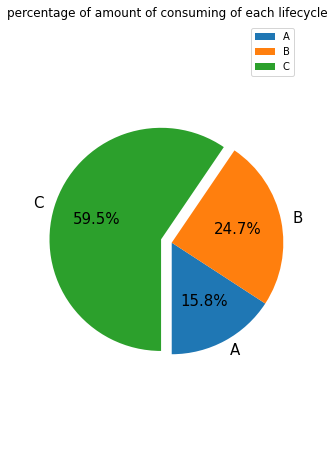

In [232]:
plt.figure(figsize=(16,8))
plt.subplot(1,3,2)
patches, l_text, p_text=plt.pie(income_total['previous_order_amount'],
                                autopct='%3.1f%%',
                                labels=labels,
                                pctdistance=0.6,
                                labeldistance=1.1,
                                radius=1,
                                startangle=270,
                                explode=explode)
for t in l_text:
    t.set_size(15)
for t in p_text:
    t.set_size(15)

plt.axis('equal')
plt.legend()
plt.title('percentage of amount of consuming of each lifecycle' )
plt.show()


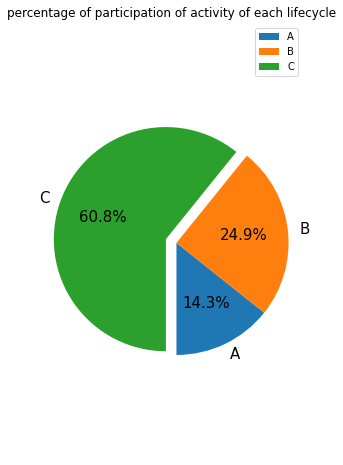

In [233]:
plt.figure(figsize=(16,8))
plt.subplot(1,3,3)
patches, l_text, p_text=plt.pie(customer_total['engaged_last_30'],
                                autopct='%3.1f%%',
                                labels=labels,
                                pctdistance=0.6,
                                labeldistance=1.1,
                                radius=1,
                                startangle=270,
                                explode=explode)
for t in l_text:
    t.set_size(15)
for t in p_text:
    t.set_size(15)

plt.axis('equal')
plt.legend()
plt.title('percentage of participation of activity of each lifecycle' ) 
plt.show()


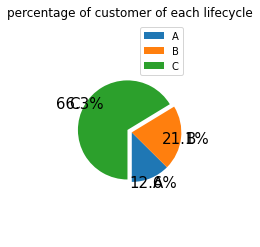

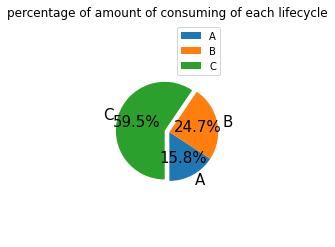

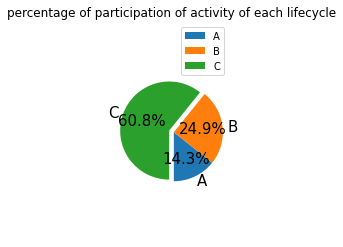

In [234]:
plt.figure(figsize=(7,4))
plt.subplot(1,3,1)
explode=[0,0,0.1]
labels=['A','B','C']
patches, l_text, p_text=plt.pie(age_percent['age'],
                                autopct='%3.1f%%',
                                labels=labels,
                                pctdistance=1.1,
                                radius=1,
                                startangle=270,
                                explode=explode)
for t in l_text:
    t.set_size(15)
for t in p_text:
    t.set_size(15)

plt.axis('equal')
plt.legend()
plt.title('percentage of customer of each lifecycle' )

plt.figure(figsize=(7,4))
plt.subplot(1,3,2)
patches, l_text, p_text=plt.pie(income_total['previous_order_amount'],
                                autopct='%3.1f%%',
                                labels=labels,
                                pctdistance=0.6,
                                labeldistance=1.1,
                                radius=1,
                                startangle=270,
                                explode=explode)
for t in l_text:
    t.set_size(15)
for t in p_text:
    t.set_size(15)

plt.axis('equal')
plt.legend()
plt.title('percentage of amount of consuming of each lifecycle' )
plt.show()


plt.figure(figsize=(7,4))
plt.subplot(1,3,3)
patches, l_text, p_text=plt.pie(customer_total['engaged_last_30'],
                                autopct='%3.1f%%',
                                labels=labels,
                                pctdistance=0.6,
                                labeldistance=1.1,
                                radius=1,
                                startangle=270,
                                explode=explode)
for t in l_text:
    t.set_size(15)
for t in p_text:
    t.set_size(15)

plt.axis('equal')
plt.legend()
plt.title('percentage of participation of activity of each lifecycle' ) 
plt.show()



In [235]:
# A: new users:register within six months B:register beween six months and one year
# C: old users:register over one year
# conclusion5: 
# 1.Old users account for 66.3% in total number of users 
# 2.Old useres(C) consumed more than new users(A and B)
# 3.Old users are active to participate activities and they are loyal to app


In [236]:
# 4.analysis the percentage of age in the lifecycle
life_age=data.pivot_table(index='age',values='revenue',columns='lifecycle',aggfunc='count')
life_age.fillna(0, inplace=True)
print(life_age)

lifecycle    A     B     C
age                       
18.0       0.0   0.0   1.0
19.0       1.0   5.0   8.0
20.0       0.0   1.0   5.0
21.0       2.0   2.0   6.0
22.0       1.0   1.0   8.0
...        ...   ...   ...
95.0       1.0   8.0  30.0
96.0       5.0   8.0  23.0
97.0       1.0  10.0  14.0
98.0       1.0   1.0   9.0
99.0       4.0   6.0  29.0

[82 rows x 3 columns]


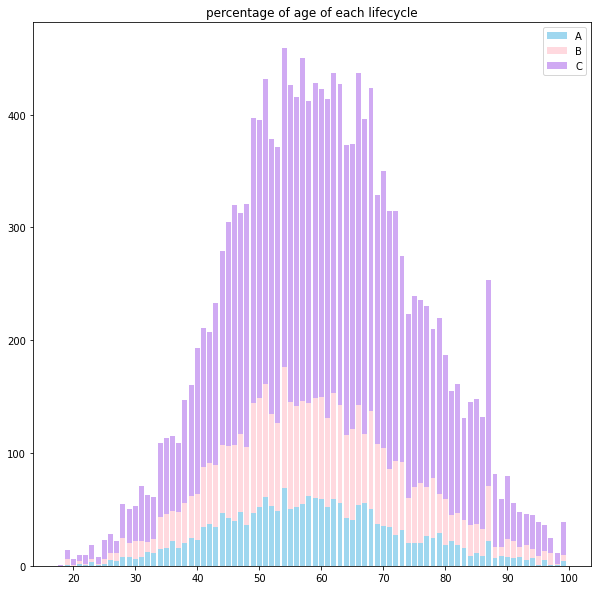

In [237]:
fig=plt.figure(figsize=(10,10))
plt.bar(life_age.index,life_age['A'],color='#87CEEB',label='A',alpha=0.8)#008080
plt.bar(life_age.index,life_age['B'],bottom=life_age['A'],color='#FFC0CB',label='B',alpha=0.6)
plt.bar(life_age.index,life_age['C'],bottom=life_age['A']+life_age['B'],color='#8A2BE2',label='C',alpha=0.4)
plt.legend()
plt.title('percentage of age of each lifecycle')
plt.savefig('final_project4')
plt.show()




lifecycle     A     B      C
female       89   155    490
male       2010  3378  10594


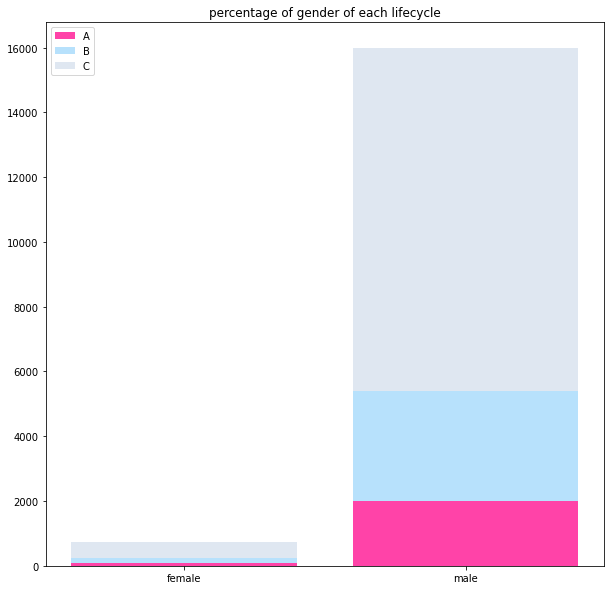

In [238]:
life_gender=data.pivot_table(index='gender',values='revenue',columns='lifecycle',aggfunc='count')
life_gender.index=['female','male']
print(life_gender)
fig=plt.figure(figsize=(10,10))
plt.bar(life_gender.index,life_gender['A'],color='#FF1493',label='A',alpha=0.8)
plt.bar(life_gender.index,life_gender['B'],bottom=life_gender['A'],color='#87CEFA',label='B',alpha=0.6)
plt.bar(life_gender.index,life_gender['C'],bottom=life_gender['A']+life_gender['B'],color='#B0C4DE',label='C',alpha=0.4)
plt.legend()
plt.title('percentage of gender of each lifecycle')
plt.savefig('final_project5')
plt.show()



In [239]:
#conclusion 6:
#After checking the proportion of ABC customer groups in each age and gender, 
#we can understand that there are no certain ages or genders that are particularly low
#The decrease of traffic or stream resulted in the decreasing consumption


In [240]:
# 5.get dummies
import pandas as pd #
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols #
from sklearn.linear_model import LinearRegression
data=pd.read_csv('week2.redbook.csv')
data

,revenue,gender,age,engaged_last_30,lifecycle,days_since_last_order,previous_order_amount,3rd_party_stores
0,72.98,1.0,59.0,0.0,B,4.26,2343.870,0
1,200.99,1.0,51.0,0.0,A,0.94,8539.872,0
2,69.98,1.0,79.0,0.0,C,4.29,1687.646,1
3,649.99,NaN,NaN,NaN,C,14.90,3498.846,0
4,83.59,NaN,NaN,NaN,C,21.13,3968.490,4
...,...,...,...,...,...,...,...,...
29447,43.19,NaN,NaN,NaN,C,0.94,545.180,1
29448,62.97,1.0,53.0,0.0,C,3.45,3738.912,1
29449,87.26,NaN,NaN,NaN,C,10.42,1279.530,0
29450,19.99,1.0,69.0,0.0,C,16.87,669.580,3


In [241]:
# dealing with data and make them dummies
data['age']=data['age'].fillna(data['age'].median())
data['gender']=data['gender'].fillna('Unknown')
data['engaged_last_30']=data['engaged_last_30'].fillna('unknown')
data1=pd.get_dummies(data)
data1.head()


,revenue,age,days_since_last_order,previous_order_amount,3rd_party_stores,gender_0.0,gender_1.0,gender_Unknown,engaged_last_30_0.0,engaged_last_30_1.0,engaged_last_30_unknown,lifecycle_A,lifecycle_B,lifecycle_C
0,72.98,59.0,4.26,2343.870,0,0,1,0,1,0,0,0,1,0
1,200.99,51.0,0.94,8539.872,0,0,1,0,1,0,0,1,0,0
2,69.98,79.0,4.29,1687.646,1,0,1,0,1,0,0,0,0,1
3,649.99,60.0,14.90,3498.846,0,0,0,1,0,0,1,0,0,1
4,83.59,60.0,21.13,3968.490,4,0,0,1,0,0,1,0,0,1


In [242]:
# 6.analysis the correlation
data1.corr()[['revenue']].sort_values('revenue',ascending=False)


,revenue
revenue,1.000000
previous_order_amount,0.168540
engaged_last_30_1.0,0.038287
days_since_last_order,0.036654
gender_Unknown,0.017722
engaged_last_30_unknown,0.017722
lifecycle_A,0.013683
lifecycle_C,-0.002221
lifecycle_B,-0.008651
gender_1.0,-0.012422


<AxesSubplot:>

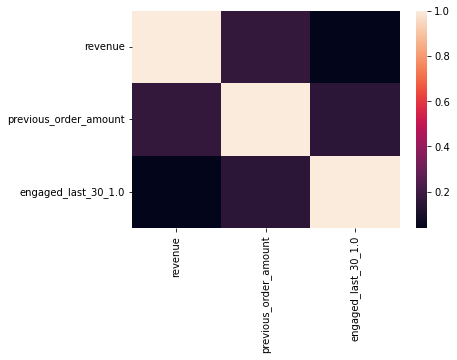

In [243]:
q=['revenue','previous_order_amount','engaged_last_30_1.0']
sns.heatmap(data1[q].corr())



In [244]:
#conclusion 7: from the correlation and heatmap,we can see the biggest factor
#to influence the revenue is previous_order_amount

In [245]:
# 7.building the linear regression and multiple regression
#Only select previous_order_amount as the independent variable, 
# and the revenue as dependent variable 
from sklearn.linear_model import LinearRegression
model=LinearRegression()
y=data1['revenue']
x=data1[['previous_order_amount']]
model.fit(x,y)



LinearRegression()

In [246]:
# #coef 回归系数 intercept（斜率）截距
model.coef_

array([0.06800681])

In [247]:
model.intercept_


238.54650492085716

In [248]:
# give score of model
score=model.score(x,y)
print(score)
# predict 
predictions=model.predict(x)
#count the error
error=predictions-y
#evaluate the model by rmse and mae
#count rmse（Root Mean Squard Error）
rmse=(error**2).mean()**0.5
#count mae（Mean Absolute Error）
mae=abs(error).mean()
print(rmse)
print(mae)


0.02840574376132865
946.4990744073566
356.9227080769107


In [249]:
# using ols model and the method is Least Squares
from statsmodels.formula.api import ols
x=data1[['previous_order_amount']]  
y=data1['revenue']
model=ols('y~x',data1).fit() 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     861.0
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          1.43e-186
Time:                        22:01:05   Log-Likelihood:            -2.4362e+05
No. Observations:               29452   AIC:                         4.872e+05
Df Residuals:                   29450   BIC:                         4.873e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    238.5465      7.750     30.782      0.0

In [250]:
# conclusion 8: R value is only 0.028, we need more variables

In [251]:
# building the multiple regression
from sklearn.linear_model import LinearRegression
model=LinearRegression()
y=data1['revenue']
x=data1[['previous_order_amount','engaged_last_30_1.0','gender_Unknown']]
model.fit(x,y)
score=model.score(x,y)
print(score)
#predict y
predictions=model.predict(x)
#count the error
error=predictions-y
##evaluate the model by rmse and mae
#count rmse（Root Mean Squard Error）
rmse=(error**2).mean()**0.5
#count mae（Mean Absolute Error）
mae=abs(error).mean()
print(rmse)
print(mae)

0.029993874607861182
945.7252024320337
355.8939276821741


In [265]:
y=data1['revenue']
x=data1[['previous_order_amount','engaged_last_30_1.0','gender_Unknown']]
model=ols('y~x',data1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     303.5
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          4.39e-194
Time:                        09:51:56   Log-Likelihood:            -2.4359e+05
No. Observations:               29452   AIC:                         4.872e+05
Df Residuals:                   29448   BIC:                         4.872e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    203.6504      9.330     21.828      0.0

In [253]:
#conclusion 9: 
# 1.R is 0.030 that is better than before
# 2.It needs to opitimizer the  model because rmse and mae are big

In [254]:
# 8.opitimization model/outlier of revenue

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='revenue', ylabel='Density'>

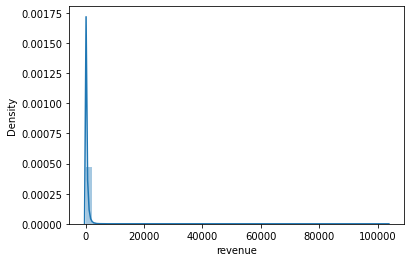

In [255]:
sns.distplot(data['revenue'])

In [256]:
data[data['revenue']<2000].shape[0]/data.shape[0]

0.9801032187966862

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='revenue', ylabel='Density'>

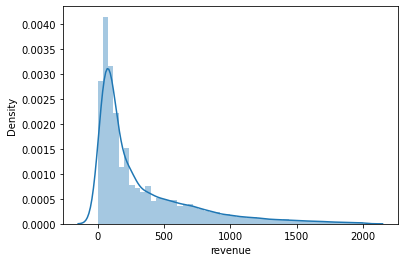

In [257]:
# from the result above, 98% sales are less than 2000
# i select revenue<2000 to build model again
data2=data1[data1['revenue']<=2000]
sns.distplot(data2['revenue'])


In [258]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
y=data2['revenue']
x=data2[['previous_order_amount']]
model.fit(x,y)
score=model.score(x,y)
print(score)
#predict y
predictions=model.predict(x)
#count the error
error=predictions-y
##evaluate the model by rmse and mae
#count rmse（Root Mean Squard Error均方误差）
rmse=(error**2).mean()**0.5
#count mae（Mean Absolute Error平均绝对误差）
mae=abs(error).mean()
print(rmse)
print(mae)

0.029587877533860385
373.23779005815084
280.4609444310085


In [259]:
# using ols model and the method is Least Squares
from statsmodels.formula.api import ols
x=data2[['previous_order_amount']]  
y=data2['revenue']
model=ols('y~x',data2).fit() 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     880.1
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          1.54e-190
Time:                        22:01:19   Log-Likelihood:            -2.1191e+05
No. Observations:               28866   AIC:                         4.238e+05
Df Residuals:                   28864   BIC:                         4.238e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    269.7274      3.096     87.122      0.0

In [260]:
#revenue=269.7274+0.02814*previous_order_amount
#if previous_order_amount add 1000, revenue will add 28.

In [261]:
# building the multiple regression
from sklearn.linear_model import LinearRegression
model=LinearRegression()
y=data2['revenue']
x=data2[['previous_order_amount','engaged_last_30_1.0']]
model.fit(x,y)
score=model.score(x,y)
print(score)
#predict y
predictions=model.predict(x)
#count the error
error=predictions-y
##evaluate the model by rmse and mae
#count rmse（Root Mean Squard Error均方误差）
rmse=(error**2).mean()**0.5
#count mae（Mean Absolute Error平均绝对误差）
mae=abs(error).mean()
print(rmse)
print(mae)

0.03019683452942412
373.1206638258946
280.2531778318627


In [262]:
y=data2['revenue']
x=data2[['previous_order_amount','engaged_last_30_1.0','3rd_party_stores']]
model=ols('y~x',data2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     304.1
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          2.07e-194
Time:                        22:01:19   Log-Likelihood:            -2.1189e+05
No. Observations:               28866   AIC:                         4.238e+05
Df Residuals:                   28862   BIC:                         4.238e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    276.1948      3.657     75.530      0.0

In [263]:
# conclusion: 
# rmse and mae have decreased from 945 to 373 and from 355 to 280.
# R value increase from 0.028 to 0.031 
# revenue=276.19+0.0268*previous_order_amount+46.12*engaged_last_30_1.0-2.31*3rd_party_stores



In [ ]:
# read data for business aspect
# 1.if previous_order_amount increase 1000, the revenue will increase 26(units)
# 2.if users participate the activity in the past 30 days, the revenue will increase 46
# 3.if users purchase in the third party stores, the revenue will decrease 2.31
# recommandations for business